In [273]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.plotly as py
import plotly
import plotly.graph_objs as go
from matplotlib import style
from scipy import stats
style.use('seaborn-deep')
from datalab_beta import *
import warnings
warnings.filterwarnings('ignore')


In [274]:
#integrate_features=pd.read_csv('FinalDataSet/spi_player_happiness.csv')
#integrate_features=integrate_features.drop('Unnamed: 0', 1)
#integrate_features.head()

# Adding new features

final_data_set['power_index'] = final_data_set['power_index1']-final_data_set['power_index2']
final_data_set['offensive'] = final_data_set['offensive1']-final_data_set['offensive2']
final_data_set['defensive'] = final_data_set['defensive1']-final_data_set['defensive2']
final_data_set['avg_players_appearance'] = final_data_set['avg_players_appearance1']-final_data_set['avg_players_appearance2']
final_data_set['avg_players_goal1'] = final_data_set['avg_players_goal1']-final_data_set['avg_players_goal2']
final_data_set['country_happiness_rank'] = final_data_set['country_happiness_rank1']-final_data_set['country_happiness_rank2']


In [275]:
#final_data_set.to_csv('FinalDataSet/finaldata_V1.csv')

# Load and prepare model_data

In [276]:
final_data_set=pd.read_csv('FinalDataSet/finaldata_V2_final.csv')
final_data_set=final_data_set.drop('Unnamed: 0', 1)
model_data = final_data_set
model_data=model_data.drop('team_1', 1)
model_data=model_data.drop('team_2', 1)
model_data=model_data.drop('team_1_score', 1)
model_data=model_data.drop('team_2_score', 1)
model_data=model_data.drop('score', 1)
model_data.head()

,fifa_rank1,gdp1,population1,avg_age1,elo1,star_count1,coach_performance1,home_country_adv1,home_continent_adv1,last_best_performance1,...,happiness_score2,life_expectancy2,freedom2,generosity2,goverment_corruption2,happiness_score,life_expectancy,freedom,generosity,goverment_corruption
0,70.0,60.0,9.0,28.1,1697.0,1.0,32.0,1.0,1.0,14.0,...,6.344,0.590148,0.449751,0.147616,0.273432,-0.381,-0.042799,-0.075967,-0.095352,-0.240469
1,45.0,132.0,14.0,27.0,1659.0,1.0,15.0,0.0,0.0,51.0,...,6.454,0.719217,0.579392,0.175097,0.178062,-1.719,-0.199030,-0.297282,-0.046465,-0.063681
2,41.0,125.0,40.0,27.2,1691.0,0.0,8.0,0.0,0.0,39.0,...,4.692,0.639333,0.249323,0.387243,0.048761,0.543,-0.041623,0.158836,-0.355033,0.039002
3,4.0,36.0,84.0,27.7,1995.0,3.0,5.0,0.0,0.0,24.0,...,6.403,0.888961,0.408781,0.190134,0.070914,-1.208,-0.093117,0.089684,-0.095031,-0.055045
4,7.0,24.0,21.0,26.4,1989.0,5.0,12.0,0.0,1.0,7.0,...,7.284,0.843887,0.601607,0.477699,0.301184,-0.842,0.000579,-0.131385,-0.347937,-0.128681


In [277]:
#from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
#from sklearn.model_selection import train_test_split

In [278]:
def training(data, target_col='winner'):
    features = data.drop(target_col, 1)
    target = data[target_col]
    x = to_array(features)
    y = to_array(target)
    #print(features)
    return x, y

In [279]:
def getAccuracy(data):
    data.winner = data.winner.astype(np.float)
    data.replace(np.inf, np.nan)
    data = data.dropna()
    data = data.sample(frac=1)
    forw_train, forw_test = train_test_split(data, 0.2)
    forw_train.reset_index(drop=True, inplace=True)
    x_forw_train, y_forw_train = training(forw_train, target_col='winner')
    #x_forw_test, y_forw_test = training(forw_test, target_col='winner')
    
    #forw_lr = LogisticRegression()
    #forw_lr.fit(x_forw_train, y_forw_train)
    #frow_lr_score=accuracy_score(y_forw_test, forw_lr.predict(x_forw_test))
    
    return x_forw_train,y_forw_train
    

In [280]:
feature_data = model_data[['fifa_rank','gdp','population','elo','avg_age','home_country_adv','home_continent_adv','last_best_performance','star_count','coach_performance','final','semi','foreign_club','att','def','mid','ovr','winner','power_index','offensive','defensive','avg_players_appearance','country_happiness_rank','happiness_score','life_expectancy','freedom','generosity','goverment_corruption'
]]
feature_data.head(5)

,fifa_rank,gdp,population,elo,avg_age,home_country_adv,home_continent_adv,last_best_performance,star_count,coach_performance,...,power_index,offensive,defensive,avg_players_appearance,country_happiness_rank,happiness_score,life_expectancy,freedom,generosity,goverment_corruption
0,3.0,23.0,-38.0,123.0,-0.6,1.0,1.0,-19.0,1.0,23.0,...,18.80825,0.47091,-0.39738,-5.782609,12.0,-0.381,-0.042799,-0.075967,-0.095352,-0.240469
1,31.0,87.0,-119.0,-207.0,-1.7,0.0,0.0,41.0,-2.0,8.0,...,-17.06127,-0.67722,0.23369,-4.956522,76.0,-1.719,-0.199030,-0.297282,-0.046465,-0.063681
2,4.0,33.0,23.0,-108.0,0.7,0.0,0.0,3.0,0.0,-6.0,...,6.76310,0.26632,-0.06961,-6.478261,-24.0,0.543,-0.041623,0.158836,-0.355033,0.039002
3,-6.0,5.0,56.0,-36.0,-0.3,0.0,-1.0,18.0,-3.0,1.0,...,-7.83635,-0.80766,0.04286,-2.695652,55.0,-1.208,-0.093117,0.089684,-0.095031,-0.055045
4,-29.0,14.0,-35.0,262.0,-0.5,0.0,1.0,-25.0,5.0,-11.0,...,25.49134,1.09352,-0.47746,-3.782609,21.0,-0.842,0.000579,-0.131385,-0.347937,-0.128681


 # Feature Comparison
   ## Recursive Feature Elimination (REF)
   

 

In [281]:
from sklearn.feature_selection import RFE

data, target = getAccuracy(feature_data)
model = LogisticRegression()
#print(data)
rfe = RFE(model, 3)
#Transforming data using RFE
X_rfe = rfe.fit_transform(data,target)
rfe = rfe.fit(X_rfe,target)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)


[ True  True  True]
[1 1 1]


In [271]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
#no of features
nof_list=np.arange(1,26) 

high_score=0

back_rev_elim_data = feature_data
y = back_rev_elim_data[['winner']]
X = back_rev_elim_data.drop("winner",1)
#cols = list(X.columns)
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))


Optimum number of features: 8
Score with 8 features: 0.353442


In [243]:
back_rev_elim_data = feature_data
y = back_rev_elim_data[['winner']]
X = back_rev_elim_data.drop("winner",1)
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 8)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['home_country_adv', 'att', 'ovr', 'defensive', 'happiness_score',
       'freedom', 'generosity', 'goverment_corruption'],
      dtype='object')


# Feature Comparison
  ## Ranking of features based on importance


In [282]:
from sklearn.ensemble import ExtraTreesClassifier
# fit an Extra Trees model to the data
#print(feature_data)
#feature_data = model_data[[''],'']
data, target = getAccuracy(feature_data)
model = ExtraTreesClassifier()
model.fit(data, target)
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
# display the relative importance of each attribute
important_features = model.feature_importances_
#print(important_features)
indices = np.argsort(important_features)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(data.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], important_features[indices[f]]))
    
#model_data.head(0)

#headers = feature_data.head(0)

    
    

Feature ranking:
1. feature 8 (0.075426)
2. feature 17 (0.072413)
3. feature 13 (0.065091)
4. feature 16 (0.061095)
5. feature 7 (0.048264)
6. feature 23 (0.047726)
7. feature 21 (0.045763)
8. feature 15 (0.038612)
9. feature 19 (0.038086)
10. feature 9 (0.037978)
11. feature 0 (0.036142)
12. feature 2 (0.035847)
13. feature 3 (0.034853)
14. feature 10 (0.033766)
15. feature 14 (0.033513)
16. feature 12 (0.033122)
17. feature 20 (0.031951)
18. feature 24 (0.031923)
19. feature 26 (0.031896)
20. feature 18 (0.031459)
21. feature 25 (0.023314)
22. feature 11 (0.023079)
23. feature 22 (0.022558)
24. feature 1 (0.020276)
25. feature 6 (0.020223)
26. feature 4 (0.018367)
27. feature 5 (0.007257)


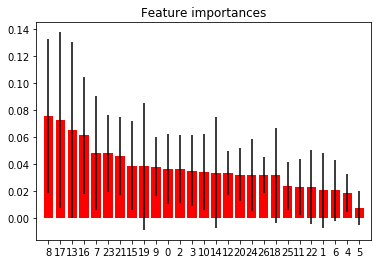

In [283]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(data.shape[1]), important_features[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(data.shape[1]), indices)
plt.xlim([-1, data.shape[1]])
plt.show()


# Feature Comparison :
   ## Backward Elimination
       

In [284]:
import statsmodels.api as sm

back_elim_data = feature_data
y = back_elim_data[['winner']]
X = back_elim_data.drop("winner",1)

cols = list(X.columns)
#print(cols)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break

selected_features_BE = cols
print(selected_features_BE)
        

['fifa_rank', 'population', 'semi', 'att', 'mid', 'offensive', 'freedom', 'goverment_corruption']


# Feature Comparison :
   ## Single feature elemination 
  ( backward selection , remove worst feature)
       Testing each feature accuracy after eliminating from full feature set

In [247]:
#model_data.head(0)
#model_data=model_data.drop('team_1_score', 1)
#model_data=model_data.drop('team_2_score', 1)
#model_data=model_data.drop('score', 1)
model_data.head()

,fifa_rank1,gdp1,population1,avg_age1,elo1,star_count1,coach_performance1,home_country_adv1,home_continent_adv1,last_best_performance1,...,happiness_score2,life_expectancy2,freedom2,generosity2,goverment_corruption2,happiness_score,life_expectancy,freedom,generosity,goverment_corruption
0,70.0,60.0,9.0,28.1,1697.0,1.0,32.0,1.0,1.0,14.0,...,6.344,0.590148,0.449751,0.147616,0.273432,-0.381,-0.042799,-0.075967,-0.095352,-0.240469
1,45.0,132.0,14.0,27.0,1659.0,1.0,15.0,0.0,0.0,51.0,...,6.454,0.719217,0.579392,0.175097,0.178062,-1.719,-0.199030,-0.297282,-0.046465,-0.063681
2,41.0,125.0,40.0,27.2,1691.0,0.0,8.0,0.0,0.0,39.0,...,4.692,0.639333,0.249323,0.387243,0.048761,0.543,-0.041623,0.158836,-0.355033,0.039002
3,4.0,36.0,84.0,27.7,1995.0,3.0,5.0,0.0,0.0,24.0,...,6.403,0.888961,0.408781,0.190134,0.070914,-1.208,-0.093117,0.089684,-0.095031,-0.055045
4,7.0,24.0,21.0,26.4,1989.0,5.0,12.0,0.0,1.0,7.0,...,7.284,0.843887,0.601607,0.477699,0.301184,-0.842,0.000579,-0.131385,-0.347937,-0.128681


In [221]:
#model_data.winner = model_data.winner.apply(to_float)

model_data.winner = model_data.winner.astype(np.float)
model_data.replace(np.inf, np.nan)
model_data = model_data.dropna()
model_data = model_data.sample(frac=1)

train, test = train_test_split(model_data, 0.2)
train.reset_index(drop=True, inplace=True)
x_train, y_train = training(train, target_col='winner')
x_test, y_test = training(test, target_col='winner')






In [222]:
print (x_train.shape)
print (x_test.shape)


(77, 68)
(19, 68)


# Train with LogisticRegression

In [99]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_score=accuracy_score(y_test, lr.predict(x_test))
lr_score=float('%.2f' %lr_score)

# Train with RandomForestClassifier

In [100]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_score=accuracy_score(y_test, rf.predict(x_test))
rf_score=float('%.2f' %rf_score)

# Train with Support Vector

In [101]:
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)
svc_score=accuracy_score(y_test, svc.predict(x_test))
svc_score=float('%.2f' %svc_score)

# Model comparison

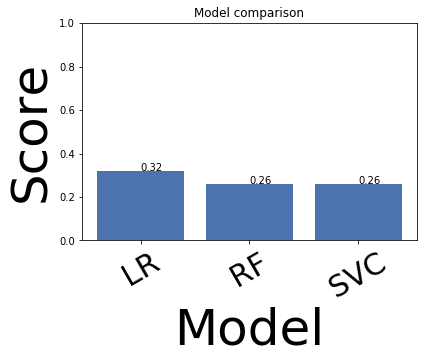

In [102]:
label=['LR','RF','SVC']
score=[lr_score,rf_score,svc_score]
index = np.arange(len(label))
plt.bar(index, score)
plt.xlabel('Model', fontsize=50)
plt.ylabel('Score', fontsize=50)
plt.xticks(index, label, fontsize=30, rotation=30)
plt.title('Model comparison')
for a,b in zip(index, score):
    plt.text(a, b, str(b))
plt.ylim(0, 1)
plt.show()

# Leave one out cross validation (LOOCV)

In [103]:
# Evaluate using Leave One Out Cross Validation
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
array = model_data.values
X = array[:,0:51]
Y = array[:,51]
num_folds = 96
num_instances = len(X)
loocv = model_selection.LeaveOneOut()
model = LogisticRegression()
#model=SVC(kernel='linear') # svc has problem
#model = RandomForestClassifier()
results = model_selection.cross_val_score(model, X, Y, cv=loocv)
print("Accuracy: %.3f%%" % (results.mean()*100.0))

Accuracy: 45.833%


# K-fold Cross Validation

In [104]:
# Evaluate using Cross Validation
array = model_data.values
X = array[:,0:51]
Y = array[:,51]
num_instances = len(X)
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LogisticRegression()
#model=SVC(kernel='linear')
#model = RandomForestClassifier()
results1 = model_selection.cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%%" % (results1.mean()*100.0))

Accuracy: 47.111%


In [105]:
predictions_lr = lr.predict(x_test)
predictions_svc = svc.predict(x_test)
predictions_rf = rf.predict(x_test)

# confusion_matrix

In [106]:
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(predictions_rf, name='Predicted')
#df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
#pd.to_numeric(df_confusion.columns)
#df_confusion.drop(['All'])
#df_confusion=df_confusion.columns.drop(['All'])

In [107]:
df_confusion

Predicted,-1.0,0.0,1.0,All
Actual,,,,
-1.0,4,2,2,8
0.0,0,0,1,1
1.0,7,2,1,10
All,11,4,4,19


In [108]:
class_taget=[-1,0,1]

In [109]:
def TP_calculate(df_confusion, class_taget):
    TP= [None] * 3
    for t in class_taget:
        for p in class_taget:
            if t==p:
                TP[p]=df_confusion[t][p]
    return TP
def TN_calculate(df_confusion, class_taget):
    TN= [None] * 3
    TN[-1]=0
    TN[1]=0
    TN[0]=0
    for t in class_taget:
        for p in class_taget:
            if t!=-1 and p!=-1:
                TN[-1]=TN[-1]+df_confusion[t][p]
            if t!=1 and p!=1:
                TN[1]=TN[1]+df_confusion[t][p]
            if t!=0 and p!=0:
                TN[0]=TN[0]+df_confusion[t][p]
    return TN
def FP_calculate(df_confusion, class_taget):
    FP= [None] * 3
    FP[-1]=0
    FP[1]=0
    FP[0]=0
    for t in class_taget:
        for p in class_taget:
            if t==p:
                continue
            else:
                FP[p]=FP[p]+df_confusion[t][p]
    return FP
def FN_calculate(df_confusion, class_taget):
    FN= [None] * 3
    FN[-1]=0
    FN[1]=0
    FN[0]=0
    for t in class_taget:
        for p in class_taget:
            if t==p:
                continue
            else:
                FN[t]=FN[t]+df_confusion[t][p]
    return FN

In [110]:
#TP=[None] * 3
TP=TP_calculate(df_confusion,class_taget)
TN=TN_calculate(df_confusion,class_taget)
FP=FP_calculate(df_confusion,class_taget)
FN=FN_calculate(df_confusion,class_taget)

In [111]:
print(TP, TN,FP,FN)

[0, 1, 4] [14, 6, 4] [1, 9, 4] [4, 3, 7]


In [112]:
def sum_list(list_tp):
    sum=0
    for i in list_tp:
        sum=sum+i
    return sum

In [113]:
precision=sum_list(TP)/float(sum_list(TP)+sum_list(FP))
recall=sum_list(TP)/float(sum_list(TP)+sum_list(FN))
accuracy=(sum_list(TP)+sum_list(TN))/float(sum_list(TP)+sum_list(TN)+sum_list(FP)+sum_list(FN))

In [114]:
print(accuracy)

0.5087719298245614


In [115]:
from pandas_ml import ConfusionMatrix
data={'y_Predicted': predictions_rf,
       'y_Actual': y_test
        }
df1 = pd.DataFrame(data, columns=['y_Predicted','y_Actual'])
Confusion_Matrix = ConfusionMatrix(df1['y_Actual'], df1['y_Predicted'])
#Confusion_Matrix.print_stats()
Confusion_Matrix.stats()

ModuleNotFoundError: No module named 'pandas_ml'

# Theorytical idea about confusion matrix

<img src="4.jpeg">
<img src="5.jpeg">
<img src="1.jpeg">
<img src="2.jpeg">
<img src="3.jpeg">
<img src="6.jpeg">

In [116]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

        -1.0       0.36      0.50      0.42         8
         0.0       0.00      0.00      0.00         1
         1.0       0.25      0.10      0.14        10

    accuracy                           0.26        19
   macro avg       0.20      0.20      0.19        19
weighted avg       0.28      0.26      0.25        19



In [117]:
def match_prediction(wc, team1, team2, model):
    match = pd.DataFrame(columns=['fifa_rank1','gdp1','population1','elo1','avg_age1','home_country_adv1','home_continent_adv1','last_best_performance1','star_count1','coach_performance1','final1','semi1','foreign_club1','att1','def1','mid1','ovr1', 'fifa_rank2','gdp2','population2','elo2','avg_age2','home_country_adv2','home_continent_adv2','last_best_performance2','star_count2','coach_performance2','final2','semi2','foreign_club2','att2','def2','mid2','ovr2']
, index=[0])
    match['fifa_rank1'] = wc[wc.country == team1]['fifa_rank'].iloc[0]
    match['gdp1'] = wc[wc.country == team1]['gdp_rank'].iloc[0]
    match['population1'] = wc[wc.country == team1]['population_rank'].iloc[0]
    match['elo1'] = wc[wc.country == team1]['elo_ranking'].iloc[0]
    match['avg_age1'] = wc[wc.country == team1]['avg_age'].iloc[0]
    match['home_country_adv1'] = wc[wc.country == team1]['home_country_adv'].iloc[0]
    match['home_continent_adv1'] = wc[wc.country == team1]['home_continent_adv'].iloc[0]
    match['last_best_performance1'] = wc[wc.country == team1]['last_best_performance'].iloc[0]
    match['star_count1'] = wc[wc.country == team1]['star_count'].iloc[0]
    match['coach_performance1'] = wc[wc.country == team1]['coach_performance'].iloc[0]
    match['final1'] = wc[wc.country == team1]['Previous_final'].iloc[0]
    match['semi1'] = wc[wc.country == team1]['Previous_semi_final'].iloc[0]
    match['foreign_club1'] = wc[wc.country == team1]['% of player in foreign club'].iloc[0]
    match['att1'] = wc[wc.country == team1]['att'].iloc[0]
    match['def1'] = wc[wc.country == team1]['def'].iloc[0]
    match['mid1'] = wc[wc.country == team1]['mid'].iloc[0]
    match['ovr1'] = wc[wc.country == team1]['ovr'].iloc[0]
    
    match['power_index1'] = wc[wc.country == team1]['spi'].iloc[0]
    match['offensive1'] = wc[wc.country == team1]['global_o'].iloc[0]
    match['defensive1'] = wc[wc.country == team1]['global_d'].iloc[0]
    match['avg_players_appearance1'] = wc[wc.country == team1]['avg_players_appearance'].iloc[0]
    match['avg_players_goal1'] = wc[wc.country == team1]['avg_players_goal'].iloc[0]
    match['country_happiness_rank1'] = wc[wc.country == team1]['Happiness.Rank'].iloc[0]
    
    match['fifa_rank2'] = wc[wc.country == team2]['fifa_rank'].iloc[0]
    match['gdp2'] = wc[wc.country == team2]['gdp_rank'].iloc[0]
    match['population2'] = wc[wc.country == team2]['population_rank'].iloc[0]
    match['elo2'] = wc[wc.country == team2]['elo_ranking'].iloc[0]
    match['avg_age2'] = wc[wc.country == team2]['avg_age'].iloc[0]
    match['home_country_adv2'] = wc[wc.country == team2]['home_country_adv'].iloc[0]
    match['home_continent_adv2'] = wc[wc.country == team2]['home_continent_adv'].iloc[0]
    match['last_best_performance2'] = wc[wc.country == team2]['last_best_performance'].iloc[0]
    match['star_count2'] = wc[wc.country == team2]['star_count'].iloc[0]
    match['coach_performance2'] = wc[wc.country == team2]['coach_performance'].iloc[0]
    match['final2'] = wc[wc.country == team2]['Previous_final'].iloc[0]
    match['semi2'] = wc[wc.country == team2]['Previous_semi_final'].iloc[0]
    match['foreign_club2'] = wc[wc.country == team2]['% of player in foreign club'].iloc[0]
    match['att2'] = wc[wc.country == team2]['att'].iloc[0]
    match['def2'] = wc[wc.country == team2]['def'].iloc[0]
    match['mid2'] = wc[wc.country == team2]['mid'].iloc[0]
    match['ovr2'] = wc[wc.country == team2]['ovr'].iloc[0]
    
    match['power_index2'] = wc[wc.country == team1]['spi'].iloc[0]
    match['offensive2'] = wc[wc.country == team1]['global_o'].iloc[0]
    match['defensive2'] = wc[wc.country == team1]['global_d'].iloc[0]
    match['avg_players_appearance2'] = wc[wc.country == team1]['avg_players_appearance'].iloc[0]
    match['avg_players_goal2'] = wc[wc.country == team1]['avg_players_goal'].iloc[0]
    match['country_happiness_rank2'] = wc[wc.country == team1]['Happiness.Rank'].iloc[0]
   
    match['fifa_rank'] = match['fifa_rank1'] - match['fifa_rank2']
    match['gdp'] = match['gdp1'] - match['gdp2']
    match['population'] = match['population1'] - match['population2']
    match['avg_age'] = match['avg_age1'] - match['avg_age2']
    match['elo'] = match['elo1'] - match['elo2']
    match['home_country_adv'] = match['home_country_adv1'] - match['home_country_adv2']
    match['home_continent_adv'] = match['home_continent_adv1'] - match['home_continent_adv2']
    match['last_best_performance'] = match['last_best_performance1'] - match['last_best_performance2']
    match['star_count'] = match['star_count1'] - match['star_count2']
    match['coach_performance'] = match['coach_performance1'] - match['coach_performance2']
    match['foreign_club'] = match['foreign_club1'] - match['foreign_club2']
    match['final'] = match['final1'] - match['final2']
    match['semi'] = match['semi1'] - match['semi2']
    match['def'] = match['def1'] - match['def2']
    match['att'] = match['att1'] - match['att2']
    match['mid'] = match['mid1'] - match['mid2']
    match['ovr'] = match['ovr1'] - match['ovr2']
    match['power_index'] = match['power_index1']-match['power_index2']
    match['offensive'] = match['offensive1']-match['offensive2']
    match['defensive'] = match['defensive1']-match['defensive2']
    match['avg_players_appearance'] = match['avg_players_appearance1']-match['avg_players_appearance2']
    match['avg_players_goal1'] = match['avg_players_goal1']-match['avg_players_goal2']
    match['country_happiness_rank'] = match['country_happiness_rank1']-match['country_happiness_rank2']

   
    match_array = match.values
    
    predict_fract=model.predict_proba(match_array)
    prediction = model.predict(match_array)
    #print(predict_fract)
    
    winner = None
    
    if prediction == 1:
        print("Winner: " + team1)
    elif prediction == -1:
        print("Winner: " + team2)
    else:
        print("The match will be draw")
    
    
    print("*** Probability ***")
    print("The probability of winning "+team1+ " "+ '%.2f'%(predict_fract[0][2]*100)+"%")
    print("The probability of winning "+team2+ " " +'%.2f'%(predict_fract[0][0]*100)+"%")
    print("The probability of draw: " '%.2f'%(predict_fract[0][1]*100)+"%")
   

In [118]:
match_prediction(integrate_features, 'sweden', 'england', rf)

Winner: england
*** Probability ***
The probability of winning sweden 30.00%
The probability of winning england 60.00%
The probability of draw: 10.00%


In [119]:
match_prediction(integrate_features, 'croatia', 'denmark', rf)


Winner: croatia
*** Probability ***
The probability of winning croatia 40.00%
The probability of winning denmark 30.00%
The probability of draw: 30.00%


In [120]:
match_prediction(integrate_features, 'spain', 'russia', rf)

Winner: spain
*** Probability ***
The probability of winning spain 40.00%
The probability of winning russia 30.00%
The probability of draw: 30.00%


In [121]:
match_prediction(integrate_features,'russia','croatia',rf)

Winner: russia
*** Probability ***
The probability of winning russia 50.00%
The probability of winning croatia 30.00%
The probability of draw: 20.00%


In [122]:
match_prediction(integrate_features, 'uruguay', 'portugal', rf)

Winner: uruguay
*** Probability ***
The probability of winning uruguay 40.00%
The probability of winning portugal 30.00%
The probability of draw: 30.00%


In [123]:
match_prediction(integrate_features, 'brazil', 'mexico', rf)

The match will be draw
*** Probability ***
The probability of winning brazil 30.00%
The probability of winning mexico 30.00%
The probability of draw: 40.00%
